In [52]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import time

def generate_points(length, height, num_points):
    points = []
    for i in range(num_points):
        x = random.uniform(0, length)
        y = random.uniform(0, height)
        points.append((x, y))

    sns.set_style('darkgrid')
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points])
    plt.title('Scatter Plot of Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    #pairwise distances
    distances = []
    for i in range(num_points):
        row = []
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            row.append(dist)
        distances.append(row)

    return points, distances


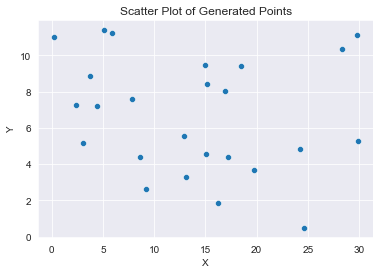

Generated Points: [(14.928247487600082, 9.484221219476273), (16.931871848337135, 8.040119836660192), (4.396712161606741, 7.201588416162622), (13.054879520052213, 3.2906082807690105), (0.17341759360779418, 10.991454291133214)]
Pairwise Distances: [[0.0, 2.469805535419799, 10.776068338564357, 6.470730157899992, 14.83161342312241, 9.997524518305742, 14.96245541982027, 3.500946836608236, 10.416979108301955, 4.414782888966666, 7.725404871825175, 12.59699343609248, 12.72093823897118, 9.19255810333493, 8.932224799237773, 15.530188701443215, 13.397426709339086, 4.907126580316512, 5.602013433355726, 13.209616594809567, 1.062340809152612, 11.174665719266004, 8.116808598367315, 7.382566156060063, 7.503204552920964]]


In [53]:
length = 30.0
height = 12.0
#num_points = 136
num_points = 25

source_points, source_distances = generate_points(length, height, num_points)
print('Generated Points:', source_points[:5])
print('Pairwise Distances:', source_distances[:1])


Nearest Neighbur Algorithm

In [54]:
import numpy as np
import itertools

def find_shortest_route(points):

    num_points = len(points)
    distances = [[0] * num_points for _ in range(num_points)]
    for i in range(num_points):
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            distances[i][j] = dist

    current_point = random.randint(0, num_points - 1)
    route = [current_point]

    while len(route) < num_points:
        nearest_neighbor = None
        nearest_distance = float('inf')
        for i in range(num_points):
            if i not in route and distances[current_point][i] < nearest_distance:
                nearest_neighbor = i
                nearest_distance = distances[current_point][i]

        
        route.append(nearest_neighbor)
        current_point = nearest_neighbor

    length = 0
    for i in range(num_points):
        length += distances[route[i]][route[(i + 1) % num_points]]

    return route, length


In [55]:
start_time = time.time()
shortest_route, shortest_length = find_shortest_route(source_points)
end_time = time.time()
bruteForceTime = end_time - start_time

Genetic Algorithm

In [56]:
import random
import numpy as np

def create_chromosome(num_points):
    chromosome = list(range(num_points))
    random.shuffle(chromosome)
    return chromosome

def fitness(chromosome, distances):
    total_distance = 0
    for i in range(len(chromosome) - 1):
        j = chromosome[i]
        k = chromosome[i+1]
        total_distance += distances[j][k]
    return 1 / total_distance

def crossover(parent1, parent2):
    n = len(parent1)
    a = random.randint(0, n-1)
    b = random.randint(0, n-1)
    if a > b:
        a, b = b, a
    child = [-1] * n
    for i in range(a, b+1):
        child[i] = parent1[i]
    j = 0
    for i in range(n):
        if child[i] == -1:
            while parent2[j] in child:
                j += 1
            child[i] = parent2[j]
            j += 1
    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        n = len(chromosome)
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        chromosome[a], chromosome[b] = chromosome[b], chromosome[a]
    return chromosome

def select_parents(population, distances):
    fitness_values = [fitness(chromosome, distances) for chromosome in population]
    cum_sum = np.cumsum(fitness_values)
    selection_probabilities = cum_sum / cum_sum[-1]
    parent1_idx = np.searchsorted(selection_probabilities, random.random())
    parent2_idx = np.searchsorted(selection_probabilities, random.random())
    return population[parent1_idx], population[parent2_idx]

def generate_population(num_points, pop_size):
    population = [create_chromosome(num_points) for _ in range(pop_size)]
    return population

def genetic_algorithm(distances, pop_size=136, num_generations=100, mutation_rate=0.05):
    num_points = len(distances)
    population = generate_population(num_points, pop_size)
    best_chromosome = None
    best_fitness = 0
    for gen in range(num_generations):
        new_population = []
        for _ in range(pop_size):  
            parent1, parent2 = select_parents(population, distances)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        population = new_population
        fitness_values = [fitness(chromosome, distances) for chromosome in population]
        idx = np.argmax(fitness_values)
        if fitness_values[idx] > best_fitness:
            best_chromosome = population[idx]
            best_fitness = fitness_values[idx]
    distance = 0
    for i in range(len(best_chromosome) - 1):
        j = best_chromosome[i]
        k = best_chromosome[i+1]
        distance += distances[j][k]
    return best_chromosome, distance



In [57]:
start_time = time.time()
ga_shortest_route, ga_distance = genetic_algorithm(source_distances, 150, 50, 0.05)
end_time = time.time()
gaTime = end_time-start_time

In [58]:
def calculate_length(route: List[int], distances: List[List[float]]) -> float:
    if len(route) != len(distances):
        raise ValueError("Route and distances lists must have the same length")
    
    length = 0
    for i in range(len(route) - 1):
        if route[i] < 0 or route[i] >= len(distances) or route[i+1] < 0 or route[i+1] >= len(distances):
            raise ValueError("Invalid index in route list")
        length += distances[route[i]][route[i+1]]
    length += distances[route[-1]][route[0]]
    return length


Lin Kernighan Algorithm

In [59]:
from typing import List, Tuple
import numpy as np
from math import sqrt

def lin_kernighan_algorithm(distances: List[List[float]], max_iterations: int=1000) -> Tuple[List[int], float]:

    n = len(distances)
    gain_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            gain_matrix[i][j] = distances[i][j] - distances[i][j-1]
            gain_matrix[j][i] = gain_matrix[i][j]

    route = list(range(n))
    best_route = route.copy()
    best_length = calculate_length(route, distances)
    
    for _ in range(max_iterations):

        max_gain = 0
        for i in range(n):
            for j in range(i+2, n):
                if i == 0 and j == n-1:
                    continue
                gain = gain_matrix[route[i]][route[j]] + gain_matrix[route[i+1]][route[j-1]] - gain_matrix[route[i]][route[i+1]] - gain_matrix[route[j-1]][route[j]]
                if gain > max_gain:
                    max_gain = gain
                    max_i, max_j = i, j

        if max_gain == 0:
            break

        indices = list(range(max_i+1, max_j))
        indices.reverse()
        new_route = route[:max_i+1] + indices + route[max_j:]
        new_length = calculate_length(new_route, distances)

        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        route = best_route.copy()

    return route, best_length

In [60]:
start_time = time.time()
linKernighan, linKernighan_length = lin_kernighan_algorithm(source_distances)
end_time = time.time()
linKernighanTime = end_time-start_time

Simulated Annealing

In [61]:
import random
from typing import List, Tuple
import numpy as np
from math import exp, sqrt

def simulated_annealing(distances: List[List[float]], initial_temperature: float = 1000.0,
                        cooling_rate: float = 0.995, max_iterations: int = 10000) -> Tuple[List[int], float]:

    n = len(distances)
    current_route = list(range(n))
    current_length = calculate_length(current_route, distances)
    best_route = current_route.copy()
    best_length = current_length

    temperature = initial_temperature
    for i in range(max_iterations):
        if temperature < 0.1:
            break
        new_route = current_route.copy()
        j, k = sorted(random.sample(range(n), 2))
        new_route[j:k+1] = reversed(new_route[j:k+1])
        new_length = calculate_length(new_route, distances)
        delta = new_length - current_length
        if delta < 0 or random.random() < exp(-delta / temperature):
            current_route = new_route
            current_length = new_length
        if current_length < best_length:
            best_route = current_route.copy()
            best_length = current_length
        temperature *= cooling_rate

    return best_route, best_length


In [62]:
start_time = time.time()
simAnnealing_route, simAnnealing_length = simulated_annealing(source_distances, initial_temperature=100000.0, cooling_rate=0.8, max_iterations=1000000)
end_time = time.time()
simAnnealingTime = end_time-start_time

Particle Swarm Optimization

In [63]:
from typing import List, Tuple
import random
import numpy as np
from math import exp, sqrt


def particle_swarm_algorithm(distances: List[List[float]], num_particles: int=50, max_iterations: int=1000,
                             w: float=0.8, c1: float=1.0, c2: float=1.0) -> Tuple[List[int], float]:

    n = len(distances)
    positions = np.zeros((num_particles, n), dtype=int)
    pbest_positions = np.zeros((num_particles, n), dtype=int)
    gbest_position = np.zeros(n, dtype=int)
    velocities = np.zeros((num_particles, n), dtype=int)
    pbest_fitness = np.ones(num_particles) * float('inf')
    gbest_fitness = float('inf')
    
    # Initialize particles with random positions and velocities
    for i in range(num_particles):
        positions[i] = np.random.permutation(n)
        velocities[i] = np.random.permutation(n) - n // 2

    for iteration in range(max_iterations):
        for i in range(num_particles):
            fitness = calculate_length(positions[i], distances)
            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = positions[i].copy()
            if fitness < gbest_fitness:
                gbest_fitness = fitness
                gbest_position = positions[i].copy()
                
        for i in range(num_particles):
            r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            velocities[i] = w * velocities[i] + c1 * r1 * (pbest_positions[i] - positions[i]) + c2 * r2 * (gbest_position - positions[i])
            positions[i] = np.roll(positions[i] + velocities[i], random.randint(1, n-1))

    return gbest_position.tolist(), gbest_fitness


In [64]:
start_time = time.time()
pso_route, pso_length = particle_swarm_algorithm(source_distances, 1000000, 1)
end_time = time.time()
psoTime = end_time-start_time

In [65]:
import pandas as pd

outputDataframe = {

    "Algorithm"         : ["Brute force", "Two Opt Algorithm", "Three Opt Algorithm", "Genetic Algorithm", "Ant Colony Optimization", "Particle Swarm Optimization", "Lin Kernighan", "Simulated Annealing"] ,
    "Distance"          : [shortest_length, twoopt_optimized_length, threeopt_optimized_length, ga_distance, ac_distance, pso_length, linKernighan_length, simAnnealing_length],
    "Calculation Time"  : [bruteForceTime, twoOptTime, threeOptTime, gaTime, acTime, psoTime, linKernighanTime, simAnnealingTime]

}

df = pd.DataFrame(outputDataframe)
print(df)

                     Algorithm    Distance  Calculation Time
0                  Brute force  106.892256          0.003983
1            Two Opt Algorithm   86.558407          0.044011
2          Three Opt Algorithm   72.994759          3.983448
3            Genetic Algorithm  164.833164          5.015760
4      Ant Colony Optimization   55.845315          0.260236
5  Particle Swarm Optimization  162.267749         76.790891
6                Lin Kernighan  239.399057          0.938968
7          Simulated Annealing  221.358693          0.004000


In [66]:
# 50

#                      Algorithm    Distance  Calculation Time
# 0                  Brute force  153.528138          0.001992
# 1            Two Opt Algorithm  121.650490          0.029019
# 2          Three Opt Algorithm  119.150065        303.570154
# 3            Genetic Algorithm  404.022048          4.651052
# 4      Ant Colony Optimization  148.445973          1.049240
# 5  Particle Swarm Optimization  377.967609         77.514629
# 6                Lin Kernighan  576.850603          1.327296
# 7          Simulated Annealing  484.707617          0.001001

In [67]:
# #5

#                      Algorithm   Distance  Calculation Time
# 0                  Brute force  45.313027          0.000000
# 1            Two Opt Algorithm  26.793277          0.008012
# 2          Three Opt Algorithm  45.313027          0.003982
# 3            Genetic Algorithm  26.793277          1.714979
# 4      Ant Colony Optimization  26.793277          0.040007
# 5  Particle Swarm Optimization  41.523983         44.478513
# 6                Lin Kernighan  59.161229          0.000000
# 7          Simulated Annealing  41.523983          0.000000

In [68]:
# #15

#  Algorithm    Distance  Calculation Time
# 0                  Brute force   86.694525          0.000000
# 1            Two Opt Algorithm   51.885814          0.021110
# 2          Three Opt Algorithm   72.994759          3.983448
# 3            Genetic Algorithm   87.070366          3.373046
# 4      Ant Colony Optimization   55.845315          0.260236
# 5  Particle Swarm Optimization   82.287243         57.647470
# 6                Lin Kernighan  142.639755          0.323324
# 7          Simulated Annealing   95.766722          0.000000